<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/Prompt_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objects as go
import plotly.express as px

# Carregar o banco de dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Separar amostra treino e teste


# Padronizar os dados


# Lista de valores de K = [1,3,5,7,9,11,15] a serem testados


# Testar cada valor de K


# Determinar o K ótimo


# Plotar gráfico da acurácia em função de K usando Plotly e colocar uma marca no K ótimo


# Treinar o modelo KNN com o melhor valor de K


# Prever y no conjunto de teste


# Avaliar a taxa de acerto fora da amostra


# Matriz de confusão


O melhor valor de K é: 11


Taxa de acerto fora da amostra: 0.80


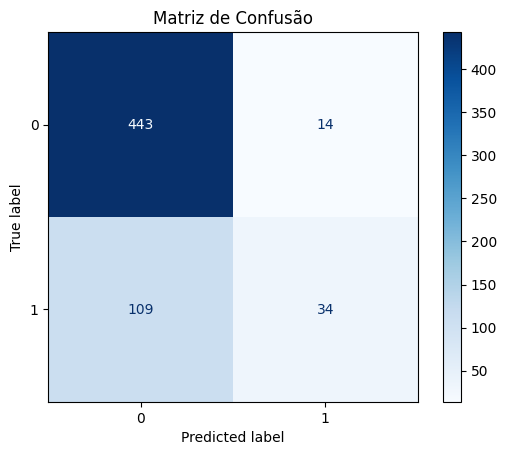

In [9]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import plotly.graph_objects as go
import plotly.express as px

# Carregar o banco de dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/04%20-%20DecisionTrees/assinatura.xlsx')

# Definir X e y
y = dados['cancel']
X = dados.drop('cancel', axis=1)

# Separar amostra treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lista de valores de K a serem testados
k_values = [1, 3, 5, 7, 9, 11, 15]
accuracies = []

# Testar cada valor de K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Determinar o K ótimo
best_k = k_values[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)
print(f"O melhor valor de K é: {best_k}")

# Plotar gráfico da acurácia em função de K usando Plotly e colocar uma marca no K ótimo
fig = go.Figure()
fig.add_trace(go.Scatter(x=k_values, y=accuracies, mode='lines+markers', name='Acurácia'))
fig.add_trace(go.Scatter(x=[best_k], y=[best_accuracy], mode='markers+text', text=[f'K ótimo: {best_k}'], textposition='top center', marker=dict(size=12, color='red'), name='K Ótimo'))

fig.update_layout(
    title='Acurácia em função de K',
    xaxis_title='Número de Vizinhos K',
    yaxis_title='Acurácia',
    xaxis=dict(tickmode='array', tickvals=k_values),
    showlegend=False
)

fig.show()

# Treinar o modelo KNN com o melhor valor de K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)

# Prever y no conjunto de teste
y_pred = knn.predict(X_test_scaled)

# Avaliar a taxa de acerto fora da amostra
accuracy = accuracy_score(y_test, y_pred)
print(f"Taxa de acerto fora da amostra: {accuracy:.2f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()
